In [1]:
from queue import PriorityQueue
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic

In [2]:
# distances are uploaded in a csv file
df=pd.read_csv("distances.csv",usecols=["name","x","y"],index_col="name")
df

,x,y
name,,
Chennai,810,100
Trichy,504,511
Madurai,386,716
Toothukudi,350,921
Salem,439,380
Nammakal,400,460
Thiruvannamalai,569,235
Coimbatore,171,526
Nilgiris,129,419


In [3]:
for i in df.index:
    print(i)

Chennai
Trichy
Madurai
Toothukudi
Salem
Nammakal
Thiruvannamalai
Coimbatore
Nilgiris
Erode
Theni
Thanjavur
Sivaganga
Thirunalveli
Kanyakumari
Tenkasi
Tiruppur
Cuddalore
Perambalur
Pudukkottai
Karur
Krishnagiri
Ranipet
Kanchipuram
Tiruvallur
Chengalpattu
Ramanathapuram
Virudhunagar
Vellore
Dindigul
Tiruvarur
Nagapattnam
Mayiladutharai
Ariyalur


In [4]:
  '''
  
    def add_nodes_from_df(self):
        for i in range(len(self.df)):
            ID,name,x,y=self.df.iloc[i]
            self.add_node(ID,name,x,y)
            
    def add_node(self,ID,name,x,y):
        node=Node(ID=ID,name=name,x=x,y=y)
        self.nodes.append(node)
    
  '''
    

'\n\n  def add_nodes_from_df(self):\n      for i in range(len(self.df)):\n          ID,name,x,y=self.df.iloc[i]\n          self.add_node(ID,name,x,y)\n          \n  def add_node(self,ID,name,x,y):\n      node=Node(ID=ID,name=name,x=x,y=y)\n      self.nodes.append(node)\n  \n'

In [5]:
a='''
class Graph():
    def __init__(self,df):
        self.df=df
        self.update_distance_matrix()
    
    #dataframe updators=============================================================================
    def df_update_distance_matrix(self):

        for name in self.df.index:
            dest_record=self.df.loc[name]
            self.df[name]=self.df.apply(Graph.compute_euclidean_distance,args=(dest_record,),axis=1) 
            
        display(self.df)

    @staticmethod
    def compute_euclidean_distance(source_record,dest_record):
        #print ("source_row",source_row)
        return (329/512.403162)*(((source_record['x']-dest_record['x'])**2 + 
                                  (source_record['y']-dest_record['y'])**2)**.5)
    #----------------------------------------------------------------------
    
    def df_update_estimated_distance_to_final_node(self,destination):
        self.df["h(x)"]= self.df.apply(Graph.compute_euclidean_distance,args=(destination,),axis=1)
        #display(self.df["h(x)"])
    
    
    #====================================PLOTTING GRAPH=========================================
    def plot_map(self):
        self.figure=plt.figure(figsize=(6,10))
        
        # display img first
        map_width=860
        map_height=1109
        self.map_dimensions=[0,map_width,0,map_height]
        
        #Background ax
        im = plt.imread("map_unlabelled.png")
        self.bg=self.figure.add_axes(self.map_dimensions)
        self.bg.imshow(im,extent=self.map_dimensions)
        self.bg.axis(False)
        #plt.imshow()

        #Another ax for scatterplot
        self.df["map_x"]=self.df["x"]
        self.df["map_y"]=self.df["y"].apply(lambda x:map_height-x)
        
        
        X=self.df["map_x"]
        Y=self.df["map_y"]
        labels=self.df["name"]
        
        mappoints=self.figure.add_axes(self.map_dimensions)    
        mappoints.scatter(X,Y,marker=".")
        mappoints.axis(False)
        
    def plot_graph(self):
        X=self.df["map_x"]
        Y=self.df["map_y"]
        labels=self.df["name"]
        
        
        self.plot_map()
        #another ax for labelling the mappoints
        mappoints_label=self.figure.add_axes(self.map_dimensions)
        for i, label in enumerate(labels):
            mappoints_label.text(X[i], Y[i], label, fontsize=8, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1')
                     )
        plt.show()
        
    
    def plot_travel(self,source_name,dest_name):
        self.plot_map()
        
        source=self.df[self.df["name"]==source_name]
        dest=self.df[self.df["name"]==dest_name]
        if (source.empty or dest.empty):
            print("check city name again")
            return
        X=[source['map_x'],dest['map_x']]
        Y=[source['map_y'],dest['map_y']]
        
        plt.plot(X,Y)
        
        x1=source["map_x"].values[0]
        x2=dest["map_x"].values[0]
        y1=source["map_y"].values[0]
        y2=dest["map_y"].values[0]
        slope=(y2-y1)/(x2-x1)
        
        text_x=(x1+x2)/2 -10
        text_y=(y1+y2)/2 -10
    
        label=str(int(g.matrix.loc[source["name"]][dest["name"]].values[0][0]))
        ic(f"The distance bw {source_name} and {dest_name} is {label}")
        
        plt.text(text_x, text_y, label, fontsize=10,ha='center', va='center',rotation=np.degrees(np.arctan(slope)),
                bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1'))
        
        plt.show()
        plt.pause(5)
        
    def determine_shortest_path_bw_2_cities(self,source_name,dest_name):
        source=self.df[self.df["name"]==source_name]
        dest=self.df[self.df["name"]==dest_name]
        if (source.empty or dest.empty):
            print("check city name again")
            return
        
        
        x1=source["map_x"].values[0]
        x2=dest["map_x"].values[0]
        y1=source["map_y"].values[0]
        y2=dest["map_y"].values[0]
        slope=(y2-y1)/(x2-x1)
        
        text_x=(x1+x2)/2 -10
        ic(text_x)
        text_y=(y1+y2)/2 -10
        ic(text_y)
        label=str(int(g.matrix.loc[source["name"]][dest["name"]].values[0][0]))
        ic(f"The distance bw {source_name} and {dest_name} is {label}")
        
        plt.text(text_x, text_y, label, fontsize=10,ha='center', va='center',rotation=np.degrees(np.arctan(slope)),
                bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1'))
            
        self.update_all_heuristics(dest)
        

'''
#plt.ion()


    

In [6]:
# make distance matrix
def compute_euclidean_distance(source_record,dest_record):
    #print ("source_row",source_row)
    return (329/512.403162)*(((source_record['x']-dest_record['x'])**2 + 
                              (source_record['y']-dest_record['y'])**2)**.5)

def update_distance_matrix(df):

    for name in df.index:
        dest_record=df.loc[name]
        df[name]=df.apply(compute_euclidean_distance,args=(dest_record,),axis=1) 

update_distance_matrix(df)
display(df)


,x,y,Chennai,Trichy,Madurai,Toothukudi,Salem,Nammakal,Thiruvannamalai,Coimbatore,...,Tiruvallur,Chengalpattu,Ramanathapuram,Virudhunagar,Vellore,Dindigul,Tiruvarur,Nagapattnam,Mayiladutharai,Ariyalur
name,,,,,,,,,,,,,,,,,,,,,
Chennai,810,100,0.000000,329.000000,480.153506,604.244845,298.436671,350.326923,177.363169,493.100425,...,30.584497,68.713762,505.680941,542.381444,143.551683,449.822110,311.938903,326.195600,257.426252,277.108422
Trichy,504,511,329.000000,0.000000,151.872891,281.207249,93.896386,74.372402,182.060119,214.026962,...,331.673818,262.495400,200.985115,215.657055,241.546461,123.840131,109.440883,149.999194,132.450710,76.560252
Madurai,386,716,480.153506,151.872891,0.000000,133.639036,218.403785,164.616180,330.433511,184.225594,...,483.513024,412.870617,100.827879,65.004890,389.535415,58.544905,204.562336,227.017820,253.852618,210.232434
Toothukudi,350,921,604.244845,281.207249,133.639036,0.000000,352.030287,297.731329,462.362228,278.444883,...,610.181774,535.897144,114.693999,69.489337,521.723746,186.211000,306.117806,314.511355,361.145114,327.979050
Salem,439,380,298.436671,93.896386,218.403785,352.030287,0.000000,57.144456,125.039403,195.953134,...,292.587885,240.848248,287.758117,282.958826,179.698887,170.357467,187.618167,229.140748,186.713988,135.882939
Nammakal,400,460,350.326923,74.372402,164.616180,297.731329,57.144456,0.000000,180.679259,153.019506,...,346.498538,289.526307,242.373667,228.326990,236.528578,113.866094,183.381133,224.266297,199.213288,143.032377
Thiruvannamalai,569,235,177.363169,182.060119,330.433511,462.362228,125.039403,180.679259,0.000000,316.565204,...,168.464223,129.331006,380.766882,395.293564,59.487943,289.625251,220.231817,253.619466,185.656693,165.840016
Coimbatore,171,526,493.100425,214.026962,184.225594,278.444883,195.953134,153.019506,316.565204,0.000000,...,484.898692,436.798132,285.014402,219.589748,364.095895,134.910121,318.761050,355.685587,346.295621,289.960983
Nilgiris,129,419,482.846235,247.917337,252.178435,352.172545,200.611453,175.981764,306.219467,73.804835,...,470.309699,433.522606,352.652754,292.280561,344.883215,198.024998,357.141272,396.862123,375.028080,318.991176


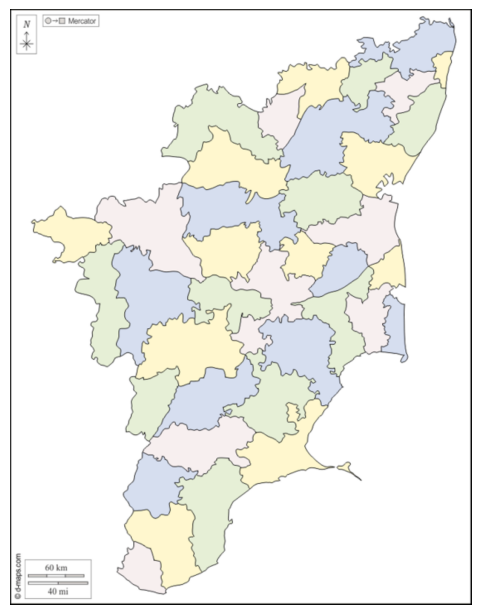

In [7]:
plt.ion()
# display img first
map_width=860
map_height=1109
map_dimensions=[0,map_width,0,map_height]
map_ratio=map_height/map_width


#PLOTTING GRAPH=========================================

def create_new_figure():
    figure,ax=plt.subplots(figsize=(6,6*map_ratio))
    ax.set_axis_off()
    return figure,ax
def add_subplot_background(figure,ax):
    #Background ax-----------------------------
    im = plt.imread("map_unlabelled.png")
    subplot_bgimage=ax.imshow(im,extent=map_dimensions)

figure,ax=create_new_figure()
add_subplot_background(figure,ax)

In [8]:
def add_subplot_scatterplot_citypoints(figure,ax):    
    #Another ax for scatterplot
    df["map_x"]=df["x"]
    df["map_y"]=df["y"].apply(lambda x:map_height-x)


    X=df["map_x"]
    Y=df["map_y"]
    labels=df.index

    mappoints=ax.scatter(X,Y,marker=".")
    #mappoints.axis(False)
add_subplot_scatterplot_citypoints(figure,ax)

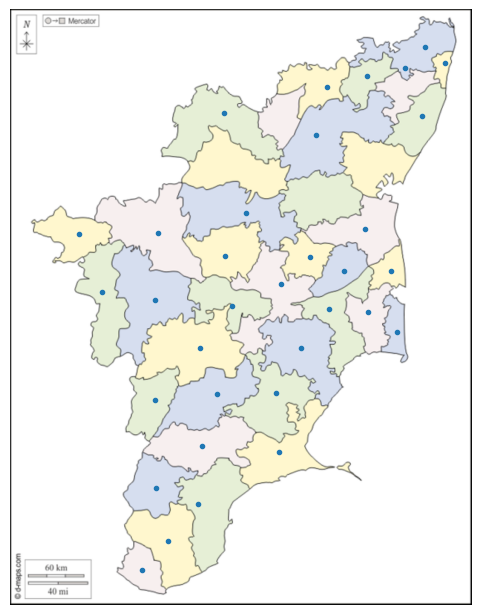

In [9]:
figure

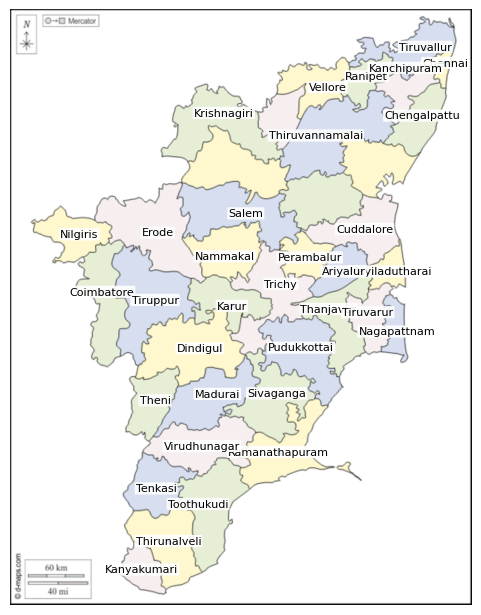

In [12]:
def add_subplot_label_cities(figure,ax,df):
    
    X=df["map_x"]
    Y=df["map_y"]
    labels=df.index
    for i, label in enumerate(labels):
        ax.text(X.iloc[i], Y.iloc[i], label, fontsize=8, ha='center', va='center',
        bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1')
                 )


add_subplot_label_cities(figure,ax,df)
figure

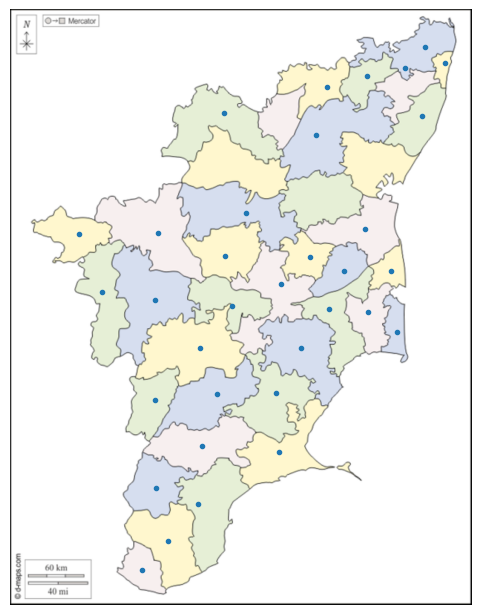

In [13]:
def restore_img():
    figure,ax=create_new_figure()
    add_subplot_background(figure,ax)
    add_subplot_scatterplot_citypoints(figure,ax)
    return figure,ax

figure,ax=restore_img()

ic| f"The distance bw {source_name} and {dest_name} is {label}": 'The distance bw Madurai and Trichy is 151'


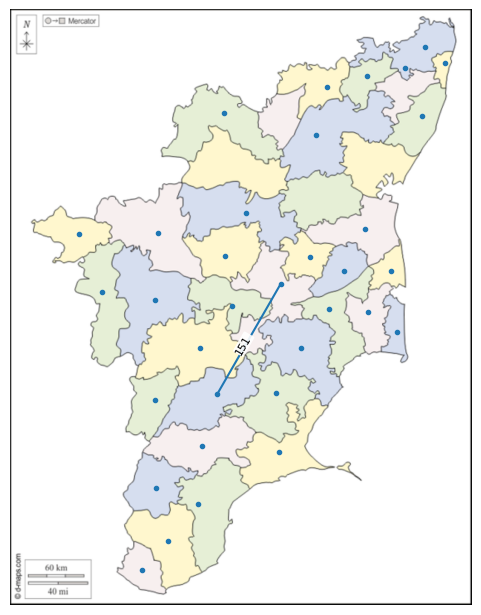

In [14]:
def add_plot_travel(figure,ax,*,source_name,dest_name):
    source=df.loc[source_name]
    dest=df.loc[dest_name]
    if (source.empty or dest.empty):
        print("check city name again")
        return
    X=[source['map_x'],dest['map_x']]
    Y=[source['map_y'],dest['map_y']]

    ax.plot(X,Y)

    x1=source["map_x"]
    x2=dest["map_x"]
    y1=source["map_y"]
    y2=dest["map_y"]
    slope=(y2-y1)/(x2-x1)

    text_x=(x1+x2)/2 -10
    text_y=(y1+y2)/2 -10

    label=str(int(source[dest.name]))
    ic(f"The distance bw {source_name} and {dest_name} is {label}")

    ax.text(text_x, text_y, label, fontsize=8,ha='center', va='center',rotation=np.degrees(np.arctan(slope)),
            bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1'))
    
    
add_plot_travel(figure,ax,source_name="Madurai",dest_name="Trichy")
figure

## Working on A* Algorithm

In [15]:
def calculate_heuristic_distance(source,dest):
    x1,y1=source[["x","y"]]
    x2,y2=dest[["x","y"]]
    d=((x2-x1)**2+(y2-y1)**2)**.5
    if d>300:
        return float("inf")
    else:
        return d
def recalculate_heuristics(df,dest_name):
    dest=df.loc[dest_name]
    df["h(x)"]=df.apply(calculate_heuristic_distance,args=(dest,),axis=1)
    display(df["h(x)"])
    
recalculate_heuristics(df,"Chennai")

name
Chennai              0.000000
Trichy                    inf
Madurai                   inf
Toothukudi                inf
Salem                     inf
Nammakal                  inf
Thiruvannamalai    276.235407
Coimbatore                inf
Nilgiris                  inf
Erode                     inf
Theni                     inf
Thanjavur                 inf
Sivaganga                 inf
Thirunalveli              inf
Kanyakumari               inf
Tenkasi                   inf
Tiruppur                  inf
Cuddalore                 inf
Perambalur                inf
Pudukkottai               inf
Karur                     inf
Krishnagiri               inf
Ranipet            148.124947
Kanchipuram         74.545288
Tiruvallur          47.634021
Chengalpattu       107.018690
Ramanathapuram            inf
Virudhunagar              inf
Vellore            223.575491
Dindigul                  inf
Tiruvarur                 inf
Nagapattnam               inf
Mayiladutharai            inf
Ariya

In [ ]:
from 

In [ ]:
# A* Algorithm Implementation

source_name="Kanyakumari"
dest_name="Chennai"


In [ ]:
      
    def determine_shortest_path_bw_2_cities(self,source_name,dest_name):
        source=self.df[self.df["name"]==source_name]
        dest=self.df[self.df["name"]==dest_name]
        if (source.empty or dest.empty):
            print("check city name again")
            return
        
        
        x1=source["map_x"].values[0]
        x2=dest["map_x"].values[0]
        y1=source["map_y"].values[0]
        y2=dest["map_y"].values[0]
        slope=(y2-y1)/(x2-x1)
        
        text_x=(x1+x2)/2 -10
        ic(text_x)
        text_y=(y1+y2)/2 -10
        ic(text_y)
        label=str(int(g.matrix.loc[source["name"]][dest["name"]].values[0][0]))
        ic(f"The distance bw {source_name} and {dest_name} is {label}")
        
        plt.text(text_x, text_y, label, fontsize=10,ha='center', va='center',rotation=np.degrees(np.arctan(slope)),
                bbox=dict(facecolor='white', alpha=0.90, edgecolor='none', boxstyle='round,pad=0.1'))
            
        self.update_all_heuristics(dest)
        

In [ ]:
#A* algorithm


In [ ]:
print()

In [ ]:

#----------------------------------------------------------------------
    
    def df_update_estimated_distance_to_final_node(self,destination):
        self.df["h(x)"]= self.df.apply(Graph.compute_euclidean_distance,args=(destination,),axis=1)
        #display(self.df["h(x)"])
    
    

In [ ]:
# priority Queue
from queue import PriorityQueue

q = PriorityQueue()

In [ ]:
q.put(100,"Chennai")
q.put(200,"madurai")
q.put(300,"trichy")


In [ ]:
a=q.get()
type(a)